In [1]:
import os

os.chdir('C:\\Users\Harsh\Downloads\WiproTrainingDatasets')

## 1.  Data exploration of NBA players and predicting their salary

In [2]:
import pandas as pd

nba = pd.read_csv('nba.csv')
print( nba.shape )
nba.head()

(457, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [4]:
nba.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [5]:
print(' Missing values in College ',nba.College.isna().sum() )
print(' Missing values in Salary ',nba.Salary.isna().sum() )

 Missing values in College  84
 Missing values in Salary  11


In [6]:
print( nba.Team.value_counts() )
nba.Team.unique().shape[0]

New Orleans Pelicans      19
Memphis Grizzlies         18
Milwaukee Bucks           16
New York Knicks           16
Phoenix Suns              15
Denver Nuggets            15
Toronto Raptors           15
Utah Jazz                 15
Miami Heat                15
Cleveland Cavaliers       15
Sacramento Kings          15
Golden State Warriors     15
Charlotte Hornets         15
Los Angeles Clippers      15
Atlanta Hawks             15
Boston Celtics            15
Los Angeles Lakers        15
Houston Rockets           15
Dallas Mavericks          15
Detroit Pistons           15
Washington Wizards        15
Brooklyn Nets             15
Chicago Bulls             15
Portland Trail Blazers    15
Indiana Pacers            15
Oklahoma City Thunder     15
San Antonio Spurs         15
Philadelphia 76ers        15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64


30

In [7]:
print( nba.Position.value_counts() )
nba.Position.unique().shape[0]

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64


5

In [8]:
print( nba.College.value_counts() )
nba.College.unique().shape[0]

Kentucky             22
Duke                 20
Kansas               18
North Carolina       16
UCLA                 15
                     ..
Boston University     1
Lehigh                1
Wichita State         1
Westchester CC        1
Bowling Green         1
Name: College, Length: 118, dtype: int64


119

In [9]:
print( type( nba.Height[0] ) )
nba.Height.isna()

<class 'str'>


0      False
1      False
2      False
3      False
4      False
       ...  
452    False
453    False
454    False
455    False
456    False
Name: Height, Length: 457, dtype: bool

In [10]:
height = [ str(i).split('-') for i in nba.Height.values ]

height[-1]

['7', '0']

In [11]:
# Converting height to cms => 1 feet = 30.48 cms and 1 icnh = 2.54 cms

heightCms = [ (float(x[0])*30.48+float(x[1])*2.54) for x in height ]

print( len(heightCms) )
heightCms[:10]

457


[187.96,
 198.12,
 195.57999999999998,
 195.57999999999998,
 208.28,
 205.74,
 203.2,
 213.36,
 187.96,
 193.04]

In [12]:
nba['heightCms'] = heightCms
nba.heightCms.isna().sum()

0

In [13]:
nba.drop(['Height'], axis=1, inplace=True)

In [14]:
import numpy as np

nba[ nba.College.isna() ]

,Name,Team,Number,Position,Age,Weight,College,Salary,heightCms
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,NaN,5000000.0,208.28
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,240.0,NaN,12000000.0,205.74
15,Bojan Bogdanovic,Brooklyn Nets,44.0,SG,27.0,216.0,NaN,3425510.0,203.20
20,Sergey Karasev,Brooklyn Nets,10.0,SG,22.0,208.0,NaN,1599840.0,200.66
32,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,205.0,NaN,30888.0,200.66
...,...,...,...,...,...,...,...,...,...
445,Dante Exum,Utah Jazz,11.0,PG,20.0,190.0,NaN,3777720.0,198.12
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,245.0,NaN,1175880.0,215.90
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,226.0,NaN,2050000.0,203.20
454,Raul Neto,Utah Jazz,25.0,PG,24.0,179.0,NaN,900000.0,185.42


<b>Domain Knowledge</b><br>
A high school player must wait at least a year to be eligible for selection. However, they are not required to spend that year in college. In 2008, high school star Brandon Jennings decided to skip college and play professional basketball in Italy. After a year, he was eligible for the 2009 draft and was selected 10th by the Milwaukee Bucks. <br> In the 2010 draft, Latavious Williams, who did not qualify academically to go to college, spent a year playing in the NBA D-League before he was drafted in the second round.
 
 
<i>Ref: https://en.wikipedia.org/wiki/NBA_high_school_draftees#:~:text=A%20high%20school%20player%20must,spend%20that%20year%20in%20college.&text=In%20the%202010%20draft%2C%20Latavious,drafted%20in%20the%20second%20round.

In [15]:
print( type(nba.College.iloc[4]) )

<class 'float'>


In [16]:
nba.College = [ 'Skipped' if type(x)== float else  x for x in nba.College ]

nba[ nba.College.isna() ]

,Name,Team,Number,Position,Age,Weight,College,Salary,heightCms


In [20]:
salary= [int(nba.Salary.mean()) if np.isnan(x) else int(x) for x in nba.Salary.values]

salary[:10]

[7730337,
 6796117,
 4842684,
 1148640,
 5000000,
 12000000,
 1170960,
 2165160,
 1824360,
 3431040]

In [18]:
nba['Salary'] = salary

### Exploratory Data Analysis and Handling Missing values

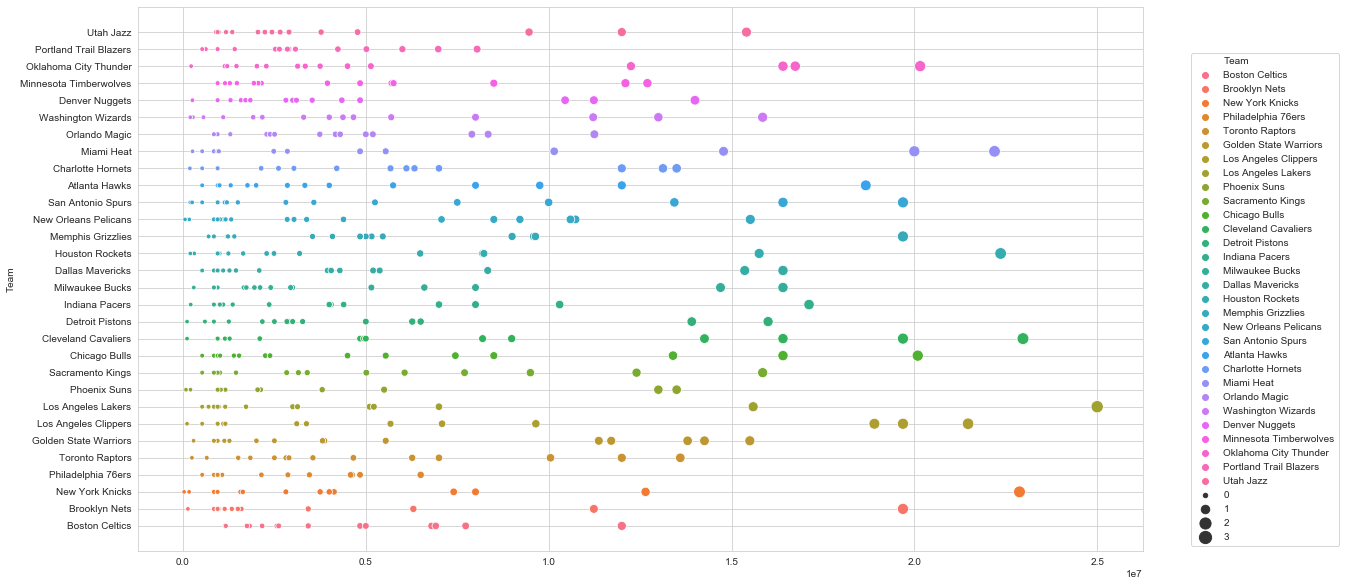

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
ax = plt.figure( figsize=(18,10) )
ax = sns.scatterplot(x=salary, y="Team", data=nba, size=salary, hue="Team", sizes=(20, 150))
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0), ncol=1)
plt.show()

In [28]:
sal = salary
sal.sort(reverse=True)
print(sal[:10])
print(sal[-20:-11])

[25000000, 22970500, 22875000, 22359364, 22192730, 21468695, 20158622, 20093064, 20000000, 19689000]
[258489, 250750, 245177, 222888, 211744, 206192, 200600, 200600, 200600]


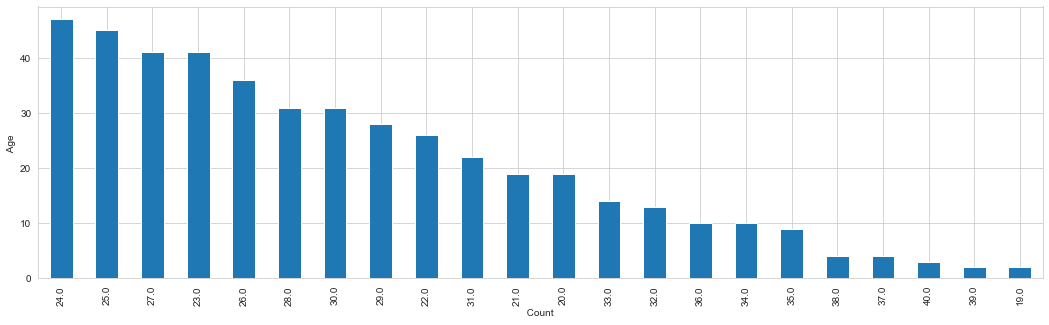

In [21]:
nba.Age.value_counts().plot(kind='bar', figsize=(18,5))
plt.xlabel(' Count ')
plt.ylabel(' Age ')
plt.show()

	Distribution of Height and Weight


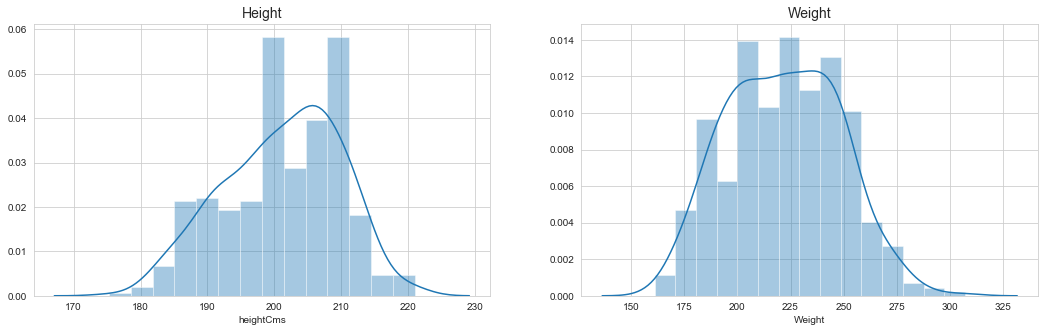

In [22]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1 = sns.distplot(nba['heightCms'], ax=ax1);
ax2 = sns.distplot(nba['Weight'], ax=ax2);
ax1.set_title('Height', size=14)
ax2.set_title('Weight', size=14)

print('\tDistribution of Height and Weight')
plt.show()

	Distribution of Age and Salary


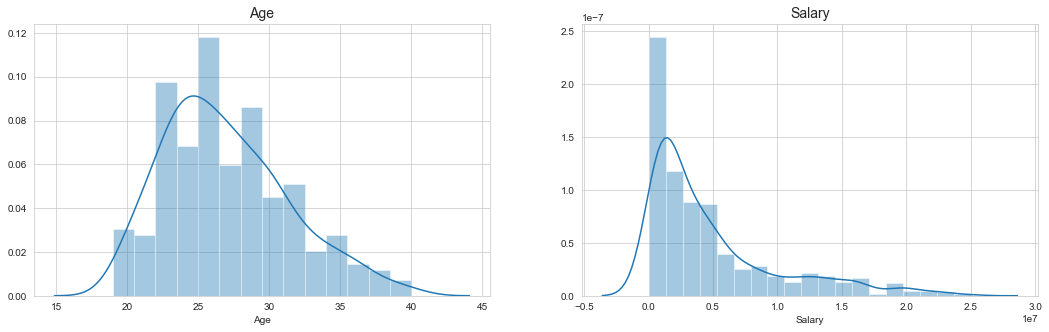

In [23]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1 = sns.distplot(nba['Age'], ax=ax1);
ax2 = sns.distplot(nba['Salary'], ax=ax2);
ax1.set_title('Age', size=14)
ax2.set_title('Salary', size=14)

print('\tDistribution of Age and Salary')
plt.show()

In [96]:
# Converting Number from float to string

kitno = [str(x) for x in nba.Number.values]
nba['Number'] = kitno
kitno[:10]

['0', '99', '30', '28', '8', '90', '55', '41', '12', '36']

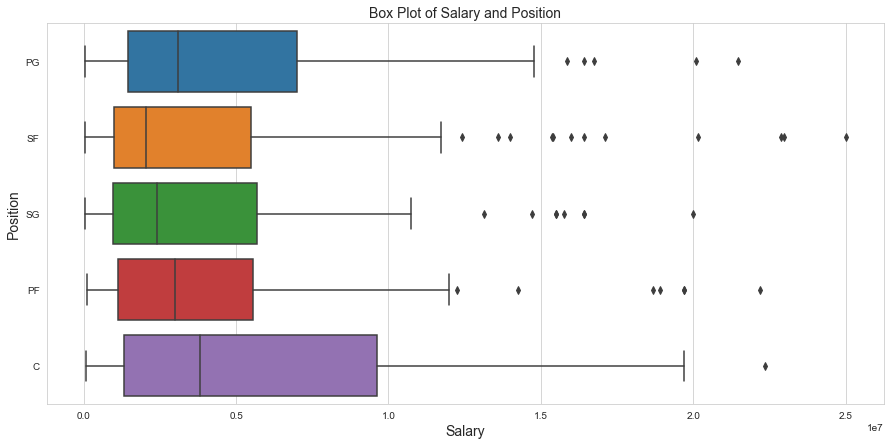

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure( figsize=(15,7) )
ax = sns.boxplot(x="Salary", y="Position", data=nba, linewidth=1.5)
plt.title('Box Plot of Salary and Position', size=14)
plt.xlabel('Salary', size=14)
plt.ylabel('Position', size=14)

plt.show()

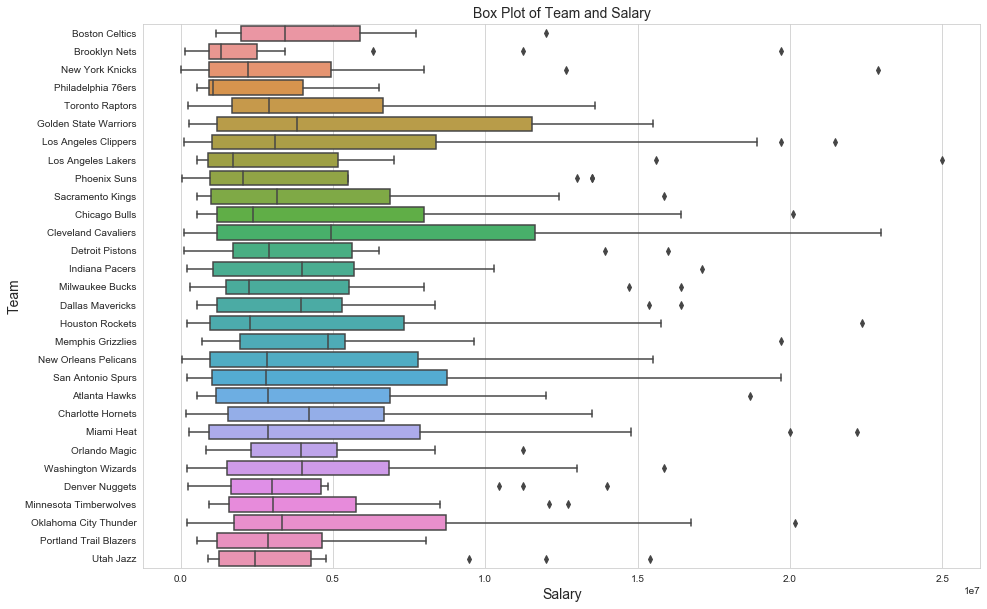

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure( figsize=(15,10) )
ax = sns.boxplot(x="Salary", y="Team", data=nba, linewidth=1.5)
plt.title('Box Plot of Team and Salary', size=14)
plt.xlabel('Salary', size=14)
plt.ylabel('Team', size=14)

plt.show()

In [27]:
# All the Teams with their max Salary recorded so far...

temp = nba.groupby(["Team"]).max().sort_values("Salary", ascending=False)
temp['Salary']

Team
Los Angeles Lakers        25000000
Cleveland Cavaliers       22970500
New York Knicks           22875000
Houston Rockets           22359364
Miami Heat                22192730
Los Angeles Clippers      21468695
Oklahoma City Thunder     20158622
Chicago Bulls             20093064
Brooklyn Nets             19689000
San Antonio Spurs         19689000
Memphis Grizzlies         19688000
Atlanta Hawks             18671659
Indiana Pacers            17120106
Dallas Mavericks          16407500
Milwaukee Bucks           16407500
Detroit Pistons           16000000
Sacramento Kings          15851950
Washington Wizards        15851950
New Orleans Pelicans      15514031
Golden State Warriors     15501000
Utah Jazz                 15409570
Denver Nuggets            14000000
Toronto Raptors           13600000
Phoenix Suns              13500000
Charlotte Hornets         13500000
Minnesota Timberwolves    12700000
Boston Celtics            12000000
Orlando Magic             11250000
Portland Trail 

In [28]:
nba.corr(method='pearson')

,Number,Age,Weight,Salary,heightCms
Number,1.000000,0.028724,0.206921,-0.111436,0.256102
Age,0.028724,1.000000,0.087183,0.210627,-0.008221
Weight,0.206921,0.087183,1.000000,0.135552,0.827701
Salary,-0.111436,0.210627,0.135552,1.000000,0.058143
heightCms,0.256102,-0.008221,0.827701,0.058143,1.000000


In [29]:
nba.pivot_table('heightCms', index='Team', columns='Position')

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,213.360000,205.740000,186.690000,198.120000,196.850000
Boston Celtics,210.820000,205.740000,186.055000,198.120000,197.485000
Brooklyn Nets,210.820000,207.645000,187.113333,NaN,196.850000
Charlotte Hornets,211.666667,209.126667,188.806667,200.660000,197.104000
Chicago Bulls,212.090000,207.772000,186.690000,201.930000,199.390000
Cleveland Cavaliers,210.820000,209.550000,189.653333,201.930000,198.120000
Dallas Mavericks,214.206667,210.185000,187.325000,207.010000,196.850000
Denver Nuggets,210.820000,204.470000,187.113333,203.200000,200.660000
Detroit Pistons,208.280000,204.470000,193.675000,201.295000,194.310000


In [30]:
nba[nba.Team == 'Brooklyn Nets']['Position'].value_counts()

SG    6
PF    4
PG    3
C     2
Name: Position, dtype: int64

In [31]:
nba.pivot_table('Salary', index='Team', columns='Position')

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,7.585417e+06,5.988067e+06,4.881700e+06,3.000000e+06,2.607758e+06
Boston Celtics,2.450465e+06,6.056987e+06,4.974652e+06,6.796117e+06,2.791668e+06
Brooklyn Nets,1.031814e+07,3.576205e+06,2.915759e+06,NaN,1.473351e+06
Charlotte Hornets,6.772240e+06,4.685770e+06,4.776152e+06,6.331404e+06,4.661406e+06
Chicago Bulls,1.042438e+07,3.361007e+06,1.117153e+07,1.958160e+06,5.717549e+06
Cleveland Cavaliers,6.828957e+06,1.394101e+07,6.551592e+06,1.195889e+07,3.977984e+06
Dallas Mavericks,2.332019e+06,3.052835e+06,4.418183e+06,8.231051e+06,8.928250e+06
Denver Nuggets,1.617240e+06,7.024978e+06,3.482413e+06,9.327590e+06,1.908232e+06
Detroit Pistons,4.090697e+06,4.000000e+06,4.260003e+06,5.173600e+06,4.580880e+06


In [32]:
nba.pivot_table('Weight', index='Team', columns='Position')

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,250.000000,239.500000,179.000000,210.500000,208.000000
Boston Celtics,250.333333,235.333333,193.750000,235.000000,206.250000
Brooklyn Nets,261.500000,219.500000,193.333333,NaN,208.833333
Charlotte Hornets,256.333333,244.000000,191.000000,232.000000,200.000000
Chicago Bulls,241.000000,240.000000,175.500000,212.500000,206.500000
Cleveland Cavaliers,257.666667,253.000000,196.333333,241.500000,213.400000
Dallas Mavericks,263.333333,240.500000,193.750000,215.000000,224.000000
Denver Nuggets,250.000000,231.500000,191.000000,208.333333,213.000000
Detroit Pistons,261.333333,237.500000,192.250000,222.500000,207.500000


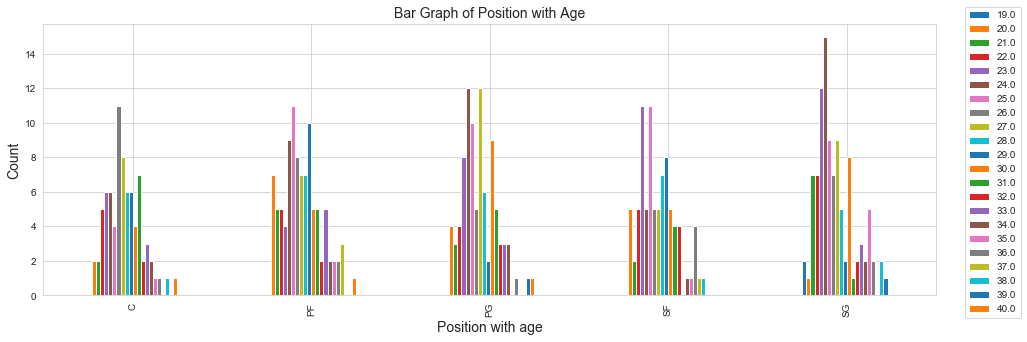

In [47]:
pd.crosstab( nba['Position'], nba['Age'] ).plot(kind='bar', figsize=(16,5))
plt.legend(loc='lower right', bbox_to_anchor=(1.1, -0.1), ncol=1)

plt.title('Bar Graph of Position with Age', size=14)
plt.xlabel('Position with age', size=14)
plt.ylabel('Count', size=14)
plt.show()

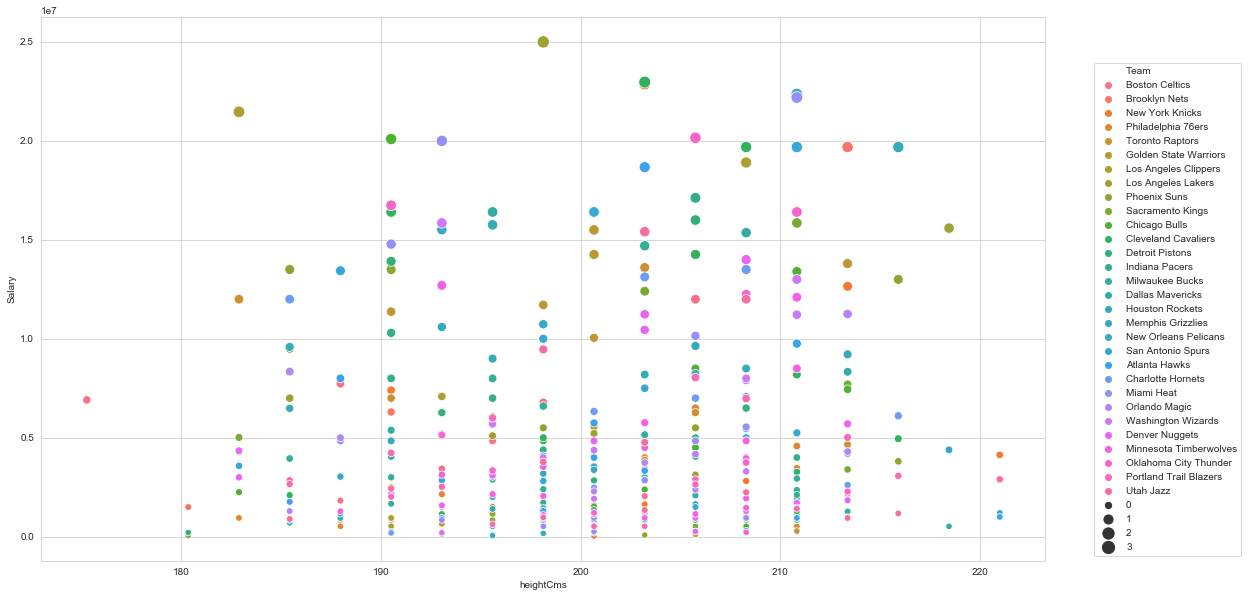

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
ax = plt.figure( figsize=(18,10) )
ax = sns.scatterplot(x="heightCms", y="Salary", data=nba, size=salary, hue="Team", sizes=(40, 150))
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0), ncol=1)
plt.show()

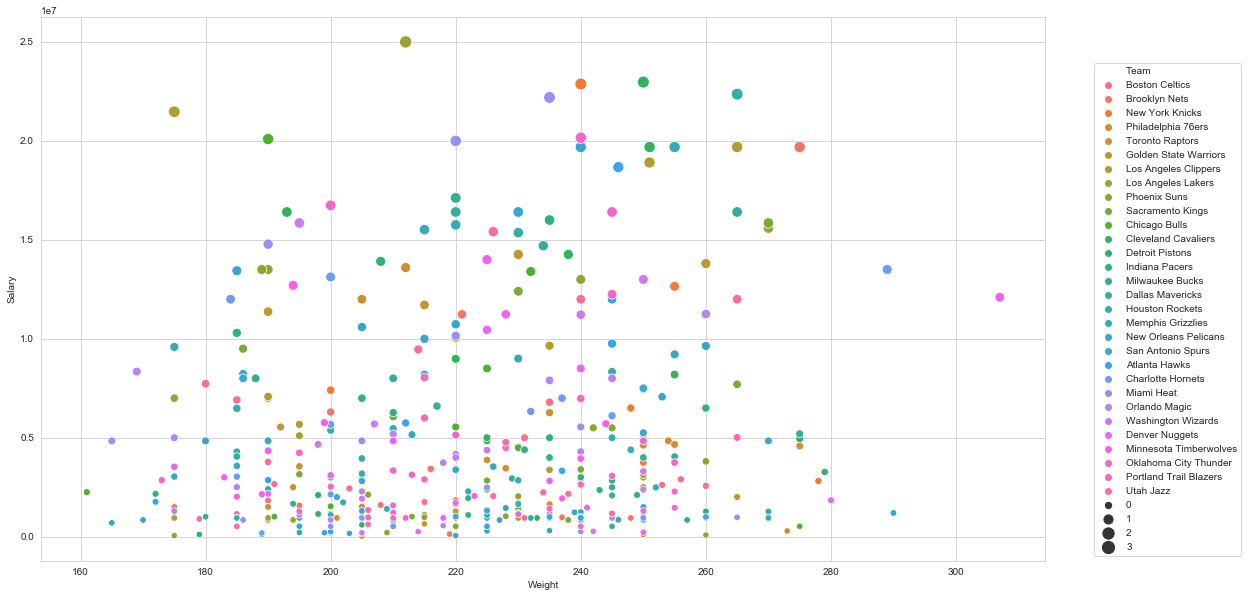

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
ax = plt.figure( figsize=(18,10) )
ax = sns.scatterplot(x="Weight", y="Salary", data=nba, size=salary, hue="Team", sizes=(40, 150))
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0), ncol=1)
plt.show()

## Test Train Split and Encoding Features

In [97]:
print( nba.shape )
nba.head(5)

(457, 9)


,Name,Team,Number,Position,Age,Weight,College,Salary,heightCms
0,Avery Bradley,Boston Celtics,0,PG,25.0,180.0,Texas,7730337,187.96
1,Jae Crowder,Boston Celtics,99,SF,25.0,235.0,Marquette,6796117,198.12
2,John Holland,Boston Celtics,30,SG,27.0,205.0,Boston University,4842684,195.58
3,R.J. Hunter,Boston Celtics,28,SG,22.0,185.0,Georgia State,1148640,195.58
4,Jonas Jerebko,Boston Celtics,8,PF,29.0,231.0,Skipped,5000000,208.28


In [98]:
y = nba['Salary']
x = nba.drop(['Salary'], axis=1)

print(x.shape)
print(y.shape)

(457, 8)
(457,)


In [99]:
# Spliting into Test and Train Data

from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split( x, y, test_size = 0.33, random_state =42) 

print(xtr.shape)
print(xte.shape)

(306, 8)
(151, 8)


In [76]:
# Encoding Categorical Features 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( vocabulary = list(nba.Team.unique()) )

vectorizer.fit( xtr['Team'].values )

xtrTeam = vectorizer.transform( xtr['Team'].values )
xteTeam = vectorizer.transform( xte['Team'].values )

print( xtrTeam.shape )
print( xteTeam.shape )

(306, 30)
(151, 30)


In [80]:
print( vectorizer.get_feature_names() )

['Boston Celtics', 'Brooklyn Nets', 'New York Knicks', 'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns', 'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers', 'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks', 'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies', 'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks', 'Charlotte Hornets', 'Miami Heat', 'Orlando Magic', 'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves', 'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz']


In [83]:
nba.Team.unique().shape[0]

30

In [81]:
xtrTeam

<306x30 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [88]:
# Encoding Categorical Features 

vectorizer = CountVectorizer( vocabulary = list(nba.Position.unique()) )

vectorizer.fit( xtr['Position'].values )

xtrPosition = vectorizer.transform( xtr['Position'].values )
xtePosition = vectorizer.transform( xte['Position'].values )

print( xtrPosition.shape )
print( xtePosition.shape )

(306, 5)
(151, 5)


In [89]:
print( vectorizer.get_feature_names() )

['PG', 'SF', 'SG', 'PF', 'C']


In [90]:
# Encoding Categorical Features 

vectorizer = CountVectorizer( vocabulary = list(nba.College.unique()) )

vectorizer.fit( xtr['College'].values )

xtrCollege = vectorizer.transform( xtr['College'].values )
xteCollege = vectorizer.transform( xte['College'].values )

print( xtrCollege.shape )
print( xteCollege.shape )

(306, 119)
(151, 119)


In [92]:
print( vectorizer.get_feature_names()[:20] )

['Texas', 'Marquette', 'Boston University', 'Georgia State', 'Skipped', 'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State', 'Washington', 'Kentucky', 'North Carolina', 'Arizona', 'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse', 'Saint Louis']


In [101]:
# Encoding Categorical Features 

vectorizer = CountVectorizer( vocabulary = list( nba.Number.unique()) )

vectorizer.fit( xtr['Number'].values )

xtrNumber = vectorizer.transform( xtr['Number'].values )
xteNumber = vectorizer.transform( xte['Number'].values )

print( xtrNumber.shape )
print( xteNumber.shape )

(306, 53)
(151, 53)


In [102]:
print( vectorizer.get_feature_names()[:20] )

['0', '99', '30', '28', '8', '90', '55', '41', '12', '36', '7', '4', '11', '13', '44', '22', '21', '24', '2', '10']


In [103]:
# Scaling Numerical Features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit( xtr['Age'].values.reshape(-1, 1) )
xtrAge = scaler.transform( xtr['Age'].values.reshape(-1, 1) )
xteAge = scaler.transform( xte['Age'].values.reshape(-1, 1) )

print( xtrAge.shape )
print( xteAge.shape )

(306, 1)
(151, 1)


In [106]:
print( xtrAge[:10] )

[[-1.13964192]
 [ 0.02356831]
 [ 0.72149445]
 [ 0.95413649]
 [ 0.02356831]
 [ 2.34998877]
 [ 0.4888524 ]
 [-0.67435783]
 [ 0.02356831]
 [ 0.95413649]]


In [105]:
# Scaling Numerical Features 

scaler = StandardScaler()

scaler.fit( xtr['Weight'].values.reshape(-1, 1) )
xtrWeight = scaler.transform( xtr['Weight'].values.reshape(-1, 1) )
xteWeight = scaler.transform( xte['Weight'].values.reshape(-1, 1) )

print( xtrWeight.shape )
print( xteWeight.shape )

(306, 1)
(151, 1)


In [107]:
print( xtrWeight[:10] )

[[ 0.71106158]
 [-0.80230892]
 [ 0.90023289]
 [ 1.46774683]
 [ 0.33271896]
 [-0.34829777]
 [ 1.08940421]
 [-0.04562367]
 [-1.3319886 ]
 [-2.27784516]]


In [108]:
# Scaling Numerical Features 

scaler = StandardScaler()

scaler.fit( xtr['heightCms'].values.reshape(-1, 1) )
xtrHeight = scaler.transform( xtr['heightCms'].values.reshape(-1, 1) )
xteHeight = scaler.transform( xte['heightCms'].values.reshape(-1, 1) )

print( xtrHeight.shape )
print( xteHeight.shape )

(306, 1)
(151, 1)


In [109]:
print( xtrHeight[:10] )

[[ 1.43136417]
 [-1.21959543]
 [ 0.84226204]
 [ 1.1368131 ]
 [ 0.84226204]
 [-0.33594223]
 [ 1.1368131 ]
 [ 0.54771097]
 [-1.51414649]
 [-2.10324863]]


In [110]:
# Merging the data together after Processing

from scipy.sparse import hstack

xtr1 = hstack(( xtrTeam, xtrPosition, xtrNumber, xtrCollege, xtrAge, xtrHeight, xtrWeight )).tocsr()
xte1 = hstack(( xteTeam, xtePosition, xteNumber, xteCollege, xteAge, xteHeight, xteWeight )).tocsr()

print( xtr1.shape, ytr.shape )
print( xte1.shape, yte.shape )

(306, 210) (306,)
(151, 210) (151,)


In [111]:
xtr1

<306x210 sparse matrix of type '<class 'numpy.float64'>'
	with 1096 stored elements in Compressed Sparse Row format>

### Support Vector Regressor

In [114]:
# Doing Hyperparameter Tuning and CV using GridSearchCV()

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error


scorer = make_scorer(mean_squared_error, greater_is_better=False)


tuned_parameters = [{'C':[ 10**-2, 0.1, 1, 10, 100, 1000 ], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9] }]


reg = GridSearchCV( SVR( epsilon = 0.01 ), tuned_parameters, cv=15, scoring= scorer, n_jobs = -1)
reg.fit(xtr1, ytr)

print("Best parameters :",reg.best_params_)
print("\nGrid scores :")
print()

means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, reg.cv_results_['params'] ):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters : {'C': 1000, 'gamma': 0.2}

Grid scores :

-31296691093167.871 (+/-28664372633625.820) for {'C': 0.01, 'gamma': 0.001}
-31296691039497.508 (+/-28664372635506.082) for {'C': 0.01, 'gamma': 0.01}
-31296690734434.668 (+/-28664372621302.680) for {'C': 0.01, 'gamma': 0.1}
-31296690644137.980 (+/-28664372592808.164) for {'C': 0.01, 'gamma': 0.2}
-31296690697962.191 (+/-28664372574262.320) for {'C': 0.01, 'gamma': 0.5}
-31296690731631.383 (+/-28664372577184.109) for {'C': 0.01, 'gamma': 0.6}
-31296690818272.516 (+/-28664372589016.066) for {'C': 0.01, 'gamma': 0.9}
-31296691035806.547 (+/-28664372636793.062) for {'C': 0.1, 'gamma': 0.001}
-31296690486515.121 (+/-28664372677779.746) for {'C': 0.1, 'gamma': 0.01}
-31296687435887.613 (+/-28664372535746.398) for {'C': 0.1, 'gamma': 0.1}
-31296686532921.141 (+/-28664372250801.492) for {'C': 0.1, 'gamma': 0.2}
-31296687071162.996 (+/-28664372065342.684) for {'C': 0.1, 'gamma': 0.5}
-31296687407854.668 (+/-28664372094560.367) for {'C

In [135]:
reg = SVR( epsilon = 0.01, C = 1000, gamma= 0.2 )
reg.fit(xtr1, ytr)

pte = reg.predict( xte1 ) 
ptr = reg.predict( xtr1 )

print(' Train RMSE ', mean_squared_error(ytr, ptr, squared=False) )
print(' Test RMSE ', mean_squared_error(yte, pte, squared=False) )

# squared : boolean value, optional (default = True)
# If True returns MSE value, if False returns RMSE value.

 Train RMSE  5601390.151391092
 Test RMSE  5294232.624879489


In [138]:
res1 = pd.DataFrame()
res1['ytr'] = ytr
ptrInt = [int(x) for x in ptr]
res1['ptr'] = ptrInt
res1['trDiff'] = res1['ytr'] - res1['ptr']

res1

,ytr,ptr,trDiff
141,3398280,2921287,476993
335,2139000,2924962,-785962
312,12000000,2938823,9061177
173,1276000,2939006,-1663006
238,15361500,2929402,12432098
...,...,...,...
106,3000000,2942048,57952
270,4842684,2918428,1924256
348,947276,2943625,-1996349
435,3075880,2928502,147378


In [139]:
res2 = pd.DataFrame()
res2['yte'] = yte
pteInt = [int(x) for x in pte]
res2['pte'] = pteInt
res2['teDiff'] = res2['yte'] - res2['pte']

res2

,yte,pte,teDiff
304,250750,2930506,-2679756
39,3750000,2931492,818508
341,14783000,2932328,11850672
218,8000000,2928539,5071461
155,525093,2928108,-2403015
...,...,...,...
349,20000000,2939614,17060386
157,8500000,2935965,5564035
175,111196,2917862,-2806666
229,1100602,2926737,-1826135


## Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

tuned_parameters = [{'max_depth':[5, 10, 15, 30, 50, 80, 100], 'max_features': ['auto', 'sqrt'], 'n_estimators': [200, 400, 600] }]


reg = GridSearchCV( RandomForestRegressor(), tuned_parameters, cv=20, scoring= scorer, n_jobs = -1)
reg.fit(xtr1, ytr)

print("Best parameters :",reg.best_params_)
print("\nGrid scores :")
print()

means = reg.cv_results_['mean_test_score']
stds = reg.cv_results_['std_test_score']

for mean, std, params in zip( means, stds, reg.cv_results_['params'] ):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

Best parameters : {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

Grid scores :

-26584219968217.355 (+/-27777373076382.320) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
-26700352729951.781 (+/-27870249714489.777) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 400}
-26724166666470.867 (+/-27607958963972.141) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 600}
-26613922876702.637 (+/-28094167709290.082) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 800}
-26661262230919.617 (+/-28060010592377.418) for {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 1000}
-25941535544953.945 (+/-25833411306134.230) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
-25945146638034.070 (+/-25715730848940.605) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 400}
-26015774457384.289 (+/-25836808935227.094) for {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 600}
-25942092922697.676 (+

In [141]:
reg = RandomForestRegressor( max_depth= 10, max_features= 'sqrt', n_estimators= 200 )
reg.fit(xtr1, ytr)

pte = reg.predict( xte1 ) 
ptr = reg.predict( xtr1 )

print(' Train RMSE ', mean_squared_error(ytr, ptr, squared=False) )
print(' Test RMSE ', mean_squared_error(yte, pte, squared=False) )

# squared : boolean value, optional (default = True)
# If True returns MSE value, if False returns RMSE value.

 Train RMSE  4197822.042513839
 Test RMSE  4976614.231908343


In [142]:
res1 = pd.DataFrame()
res1['ytr'] = ytr
ptrInt = [int(x) for x in ptr]
res1['ptr'] = ptrInt
res1['trDiff'] = res1['ytr'] - res1['ptr']

res1

,ytr,ptr,trDiff
141,3398280,4419101,-1020821
335,2139000,5374322,-3235322
312,12000000,7327362,4672638
173,1276000,5322991,-4046991
238,15361500,7650397,7711103
...,...,...,...
106,3000000,5642500,-2642500
270,4842684,4174466,668218
348,947276,5703656,-4756380
435,3075880,5982297,-2906417


In [143]:
res2 = pd.DataFrame()
res2['yte'] = yte
pteInt = [int(x) for x in pte]
res2['pte'] = pteInt
res2['teDiff'] = res2['yte'] - res2['pte']

res2

,yte,pte,teDiff
304,250750,8488297,-8237547
39,3750000,5698009,-1948009
341,14783000,5584401,9198599
218,8000000,5167333,2832667
155,525093,5116489,-4591396
...,...,...,...
349,20000000,5381495,14618505
157,8500000,6011059,2488941
175,111196,3257712,-3146516
229,1100602,5643643,-4543041


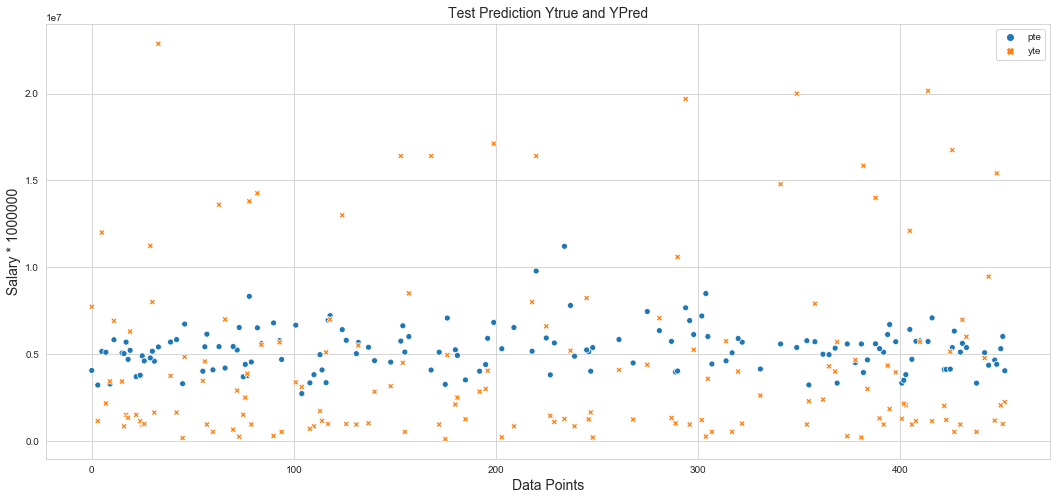

In [181]:
sns.set_style('whitegrid')
ax = plt.figure( figsize=(18,8) )
temp = res2[['pte', 'yte']]
ax = sns.scatterplot(data=temp)
plt.xlabel('Data Points', size=14)
plt.ylabel(' Salary * 1000000 ', size=14)
plt.title('Test Prediction Ytrue and YPred', size=14)
plt.show()